<center><h1 style="color:green;background-color:pink">Foreign Direct investment Analysis</h1></center>
<h2> By: Shalini Pal</h2>

Importing relevant libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

Importing the datasets

In [2]:
date_df = pd.read_csv("Datasets\\dim_date.csv")
hotels_df = pd.read_csv("Datasets\\dim_hotels.csv")
rooms_df = pd.read_csv("Datasets\\dim_rooms.csv")
fact_agg_bookings = pd.read_csv("Datasets\\fact_aggregated_bookings.csv")
fact_bookings = pd.read_csv("Datasets\\fact_bookings.csv")

Cleaning the datasets

In [3]:
date_df.head()

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday
4,05-May-22,May 22,W 19,weekeday


In [4]:
date_df.isnull().sum() #there are no missing values in the dataset

date        0
mmm yy      0
week no     0
day_type    0
dtype: int64

In [5]:
date_df.duplicated().sum() # no duplicated values

0

In [6]:
date_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      92 non-null     object
 1   mmm yy    92 non-null     object
 2   week no   92 non-null     object
 3   day_type  92 non-null     object
dtypes: object(4)
memory usage: 3.0+ KB


In [7]:
date_df.shape

(92, 4)

In [8]:
date_df['date'] = pd.to_datetime(date_df['date'])
date_df.drop(['mmm yy'],axis=1,inplace=True)
date_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      92 non-null     datetime64[ns]
 1   week no   92 non-null     object        
 2   day_type  92 non-null     object        
dtypes: datetime64[ns](1), object(2)
memory usage: 2.3+ KB


In [9]:
hotels_df.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [10]:
hotels_df.isnull().sum()

property_id      0
property_name    0
category         0
city             0
dtype: int64

In [11]:
hotels_df.duplicated().sum()

0

In [12]:
hotels_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   property_id    25 non-null     int64 
 1   property_name  25 non-null     object
 2   category       25 non-null     object
 3   city           25 non-null     object
dtypes: int64(1), object(3)
memory usage: 932.0+ bytes


In [13]:
rooms_df.head()

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [14]:
rooms_df.isnull().sum()

room_id       0
room_class    0
dtype: int64

In [15]:
rooms_df.duplicated().sum()

0

In [16]:
rooms_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   room_id     4 non-null      object
 1   room_class  4 non-null      object
dtypes: object(2)
memory usage: 196.0+ bytes


In [17]:
fact_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,01-May-22,RT1,25,30
1,19562,01-May-22,RT1,28,30
2,19563,01-May-22,RT1,23,30
3,17558,01-May-22,RT1,13,19
4,16558,01-May-22,RT1,18,19


In [18]:
fact_agg_bookings.isnull().sum()

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               0
dtype: int64

In [19]:
fact_agg_bookings.duplicated().sum()

0

In [20]:
fact_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,9100,9100
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,RT1,direct online,5.0,Checked Out,10920,10920


In [21]:
fact_agg_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9200 entries, 0 to 9199
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   property_id          9200 non-null   int64 
 1   check_in_date        9200 non-null   object
 2   room_category        9200 non-null   object
 3   successful_bookings  9200 non-null   int64 
 4   capacity             9200 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 359.5+ KB


In [22]:
fact_bookings.duplicated().sum()

0

In [23]:
fact_bookings.isnull().sum() # there are 77907 null values for ratings_given column

booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                0
room_category            0
booking_platform         0
ratings_given        77907
booking_status           0
revenue_generated        0
revenue_realized         0
dtype: int64

In [24]:
fact_bookings.shape

(134590, 12)

In [25]:
mean_ratings = fact_bookings['ratings_given'].mean()
fact_bookings['ratings_given'].fillna(mean_ratings,inplace=True)
fact_bookings['ratings_given'] = fact_bookings['ratings_given'].astype('int64')

In [26]:
fact_bookings.isnull().sum() #NO NULL VALUES

booking_id           0
property_id          0
booking_date         0
check_in_date        0
checkout_date        0
no_guests            0
room_category        0
booking_platform     0
ratings_given        0
booking_status       0
revenue_generated    0
revenue_realized     0
dtype: int64

In [27]:
fact_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134590 entries, 0 to 134589
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   booking_id         134590 non-null  object
 1   property_id        134590 non-null  int64 
 2   booking_date       134590 non-null  object
 3   check_in_date      134590 non-null  object
 4   checkout_date      134590 non-null  object
 5   no_guests          134590 non-null  int64 
 6   room_category      134590 non-null  object
 7   booking_platform   134590 non-null  object
 8   ratings_given      134590 non-null  int64 
 9   booking_status     134590 non-null  object
 10  revenue_generated  134590 non-null  int64 
 11  revenue_realized   134590 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 12.3+ MB


In [28]:
fact_bookings.shape

(134590, 12)

In [29]:
#fact_bookings.drop(['booking_id'],axis=1,inplace=True)

In [30]:
fact_bookings['room_category'] = fact_bookings['room_category'].replace({
    'RT1': 'Standard',
    'RT2': 'Elite',
    'RT3': 'Premium',
    'RT4': 'Presidential'
})

In [31]:
fact_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134590 entries, 0 to 134589
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   booking_id         134590 non-null  object
 1   property_id        134590 non-null  int64 
 2   booking_date       134590 non-null  object
 3   check_in_date      134590 non-null  object
 4   checkout_date      134590 non-null  object
 5   no_guests          134590 non-null  int64 
 6   room_category      134590 non-null  object
 7   booking_platform   134590 non-null  object
 8   ratings_given      134590 non-null  int64 
 9   booking_status     134590 non-null  object
 10  revenue_generated  134590 non-null  int64 
 11  revenue_realized   134590 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 12.3+ MB


In [32]:
fact_bookings['check_in_date'] = pd.to_datetime(fact_bookings['check_in_date'])
fact_bookings['checkout_date'] = pd.to_datetime(fact_bookings['checkout_date'])
fact_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134590 entries, 0 to 134589
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   booking_id         134590 non-null  object        
 1   property_id        134590 non-null  int64         
 2   booking_date       134590 non-null  object        
 3   check_in_date      134590 non-null  datetime64[ns]
 4   checkout_date      134590 non-null  datetime64[ns]
 5   no_guests          134590 non-null  int64         
 6   room_category      134590 non-null  object        
 7   booking_platform   134590 non-null  object        
 8   ratings_given      134590 non-null  int64         
 9   booking_status     134590 non-null  object        
 10  revenue_generated  134590 non-null  int64         
 11  revenue_realized   134590 non-null  int64         
dtypes: datetime64[ns](2), int64(5), object(5)
memory usage: 12.3+ MB


In [33]:
fact_agg_bookings['occupancy_percent'] = ((fact_agg_bookings['successful_bookings'] / fact_agg_bookings['capacity']) * 100).round(2)
fact_agg_bookings

,property_id,check_in_date,room_category,successful_bookings,capacity,occupancy_percent
0,16559,01-May-22,RT1,25,30,83.33
1,19562,01-May-22,RT1,28,30,93.33
2,19563,01-May-22,RT1,23,30,76.67
3,17558,01-May-22,RT1,13,19,68.42
4,16558,01-May-22,RT1,18,19,94.74
...,...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18,72.22
9196,16559,31-Jul-22,RT4,13,18,72.22
9197,17558,31-Jul-22,RT4,3,6,50.00
9198,19563,31-Jul-22,RT4,3,6,50.00


In [34]:
fact_agg_bookings.drop(['check_in_date','room_category'],axis=1,inplace=True)

In [35]:
fact_bookings.drop_duplicates(inplace=True)
fact_bookings.shape

(134590, 12)

In [36]:
date_df

,date,week no,day_type
0,2022-05-01,W 19,weekend
1,2022-05-02,W 19,weekeday
2,2022-05-03,W 19,weekeday
3,2022-05-04,W 19,weekeday
4,2022-05-05,W 19,weekeday
...,...,...,...
87,2022-07-27,W 31,weekeday
88,2022-07-28,W 31,weekeday
89,2022-07-29,W 31,weekeday
90,2022-07-30,W 31,weekend


In [37]:
merged_df = pd.merge(fact_bookings,date_df,left_on='check_in_date', right_on='date', how='inner')
merged_df.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,date,week no,day_type
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,Standard,direct online,1,Checked Out,10010,10010,2022-05-01,W 19,weekend
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,Standard,others,3,Cancelled,9100,3640,2022-05-01,W 19,weekend
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,Standard,logtrip,5,Checked Out,9100,9100,2022-05-01,W 19,weekend
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,Standard,others,3,Cancelled,9100,3640,2022-05-01,W 19,weekend
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,Standard,direct online,5,Checked Out,10920,10920,2022-05-01,W 19,weekend


In [38]:
merged_df = pd.merge(merged_df,hotels_df,on='property_id')
merged_df.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,date,week no,day_type,property_name,category,city
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,Standard,direct online,1,Checked Out,10010,10010,2022-05-01,W 19,weekend,Atliq Grands,Luxury,Delhi
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,Standard,others,3,Cancelled,9100,3640,2022-05-01,W 19,weekend,Atliq Grands,Luxury,Delhi
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,Standard,logtrip,5,Checked Out,9100,9100,2022-05-01,W 19,weekend,Atliq Grands,Luxury,Delhi
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,Standard,others,3,Cancelled,9100,3640,2022-05-01,W 19,weekend,Atliq Grands,Luxury,Delhi
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,Standard,direct online,5,Checked Out,10920,10920,2022-05-01,W 19,weekend,Atliq Grands,Luxury,Delhi


In [39]:
merged_df.drop(['booking_date','date'],axis=1,inplace=True)
merged_df

,booking_id,property_id,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,week no,day_type,property_name,category,city
0,May012216558RT11,16558,2022-05-01,2022-05-02,3,Standard,direct online,1,Checked Out,10010,10010,W 19,weekend,Atliq Grands,Luxury,Delhi
1,May012216558RT12,16558,2022-05-01,2022-05-02,2,Standard,others,3,Cancelled,9100,3640,W 19,weekend,Atliq Grands,Luxury,Delhi
2,May012216558RT13,16558,2022-05-01,2022-05-04,2,Standard,logtrip,5,Checked Out,9100,9100,W 19,weekend,Atliq Grands,Luxury,Delhi
3,May012216558RT14,16558,2022-05-01,2022-05-02,2,Standard,others,3,Cancelled,9100,3640,W 19,weekend,Atliq Grands,Luxury,Delhi
4,May012216558RT15,16558,2022-05-01,2022-05-02,4,Standard,direct online,5,Checked Out,10920,10920,W 19,weekend,Atliq Grands,Luxury,Delhi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134585,Jul312217564RT46,17564,2022-07-31,2022-08-03,1,Presidential,makeyourtrip,2,Checked Out,32300,32300,W 32,weekend,Atliq Seasons,Business,Mumbai
134586,Jul312217564RT47,17564,2022-07-31,2022-08-01,4,Presidential,logtrip,2,Checked Out,38760,38760,W 32,weekend,Atliq Seasons,Business,Mumbai
134587,Jul312217564RT48,17564,2022-07-31,2022-08-02,1,Presidential,tripster,3,Cancelled,32300,12920,W 32,weekend,Atliq Seasons,Business,Mumbai
134588,Jul312217564RT49,17564,2022-07-31,2022-08-01,2,Presidential,logtrip,2,Checked Out,32300,32300,W 32,weekend,Atliq Seasons,Business,Mumbai


In [40]:
merged_df.to_csv('Booking_details.csv')
fact_agg_bookings.to_csv('Occupancy.csv')


In [46]:
merged_df['year'] = merged_df['check_in_date'].dt.year
merged_df['month'] = merged_df['check_in_date'].dt.month
merged_df['day_of_week'] = merged_df['check_in_date'].dt.dayofweek
merged_df.drop(['check_in_date','checkout_date'],axis=1,inplace=True)

# Visualization

In [47]:
merged_df.head()

,booking_id,property_id,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,week no,day_type,property_name,category,city,year,month,day_of_week
0,May012216558RT11,16558,3,Standard,direct online,1,Checked Out,10010,10010,W 19,weekend,Atliq Grands,Luxury,Delhi,2022,5,6
1,May012216558RT12,16558,2,Standard,others,3,Cancelled,9100,3640,W 19,weekend,Atliq Grands,Luxury,Delhi,2022,5,6
2,May012216558RT13,16558,2,Standard,logtrip,5,Checked Out,9100,9100,W 19,weekend,Atliq Grands,Luxury,Delhi,2022,5,6
3,May012216558RT14,16558,2,Standard,others,3,Cancelled,9100,3640,W 19,weekend,Atliq Grands,Luxury,Delhi,2022,5,6
4,May012216558RT15,16558,4,Standard,direct online,5,Checked Out,10920,10920,W 19,weekend,Atliq Grands,Luxury,Delhi,2022,5,6


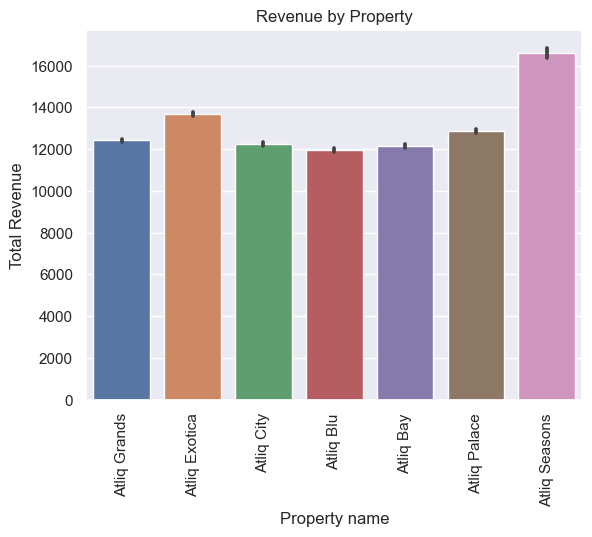

In [54]:
#plt.figure(figsize=(8,6))
sns.barplot(data=merged_df,x='property_name',y='revenue_realized')
plt.xticks(rotation=90)
plt.xlabel("Property name")
plt.ylabel("Total Revenue")
plt.title("Revenue by Property")
plt.show()

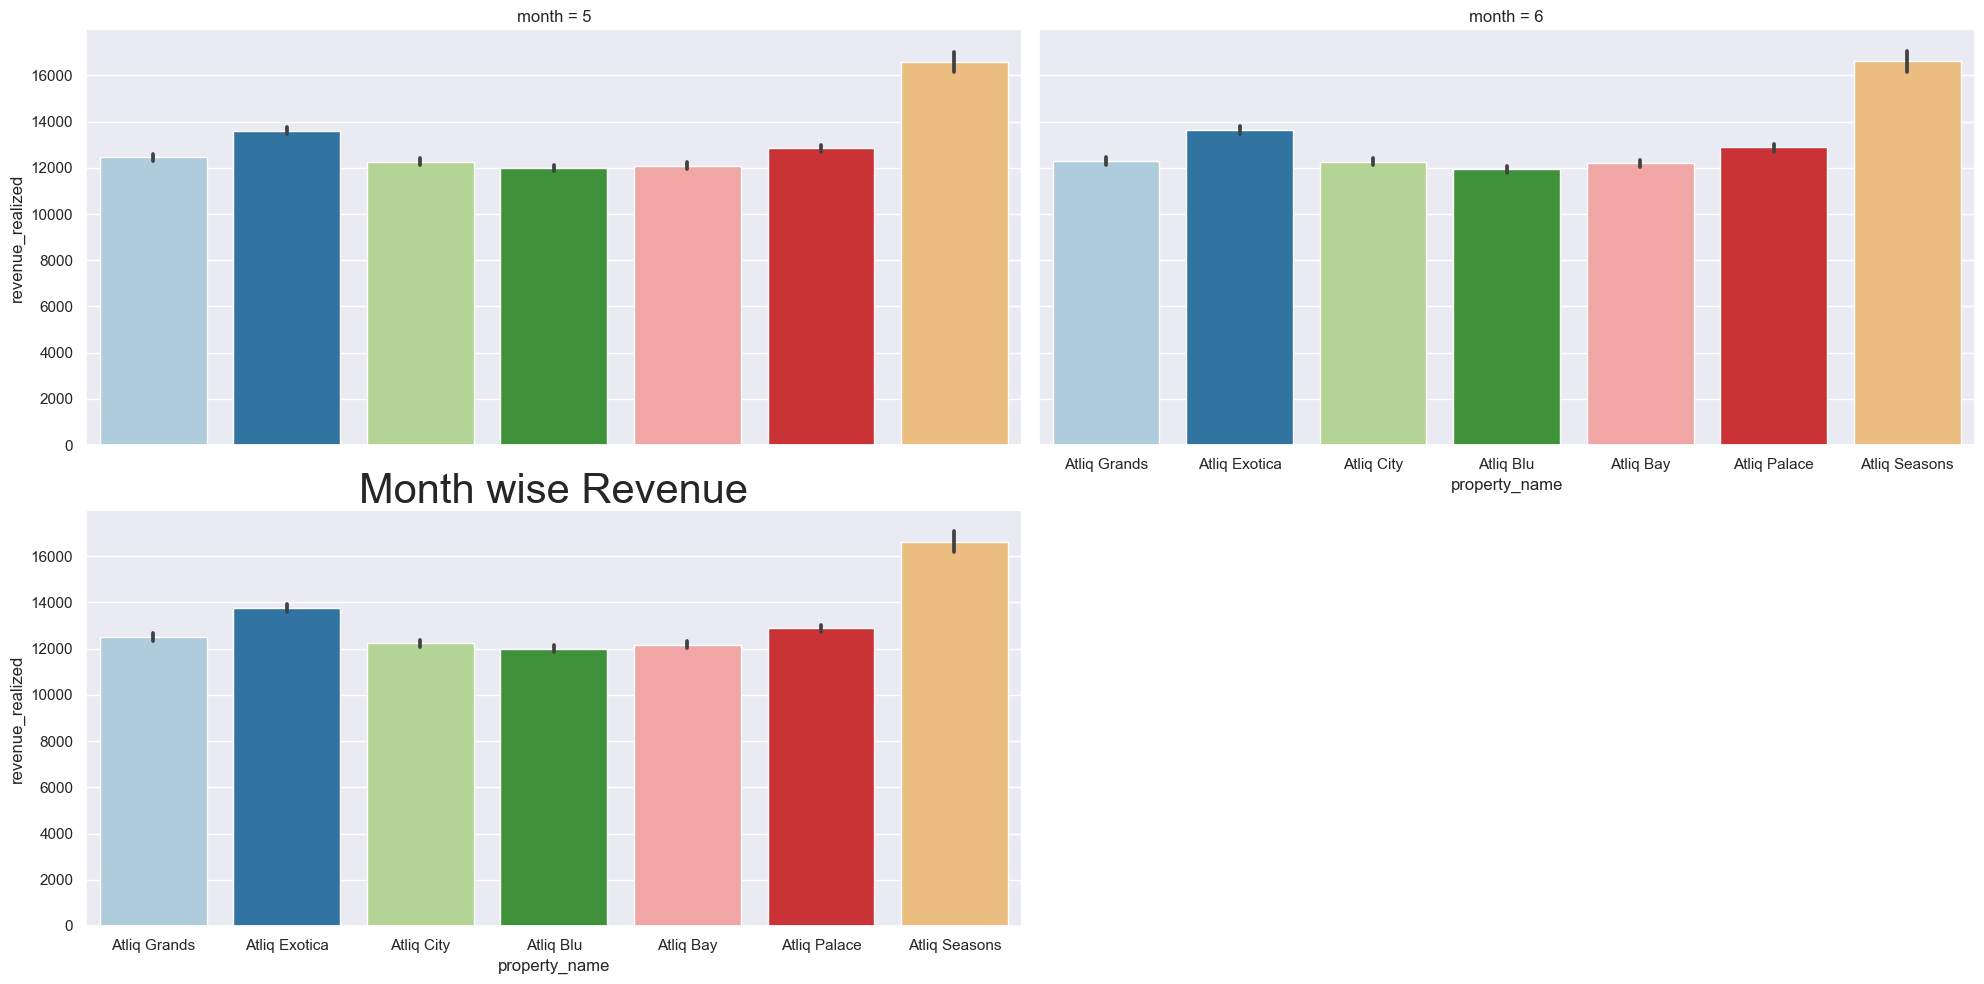

In [60]:

sns.catplot(y = 'revenue_realized', x = 'property_name', data = merged_df, aspect=2,palette='Paired',kind="bar",col='month',col_wrap=2)
plt.title("Month wise Revenue",fontsize=30)
plt.show()

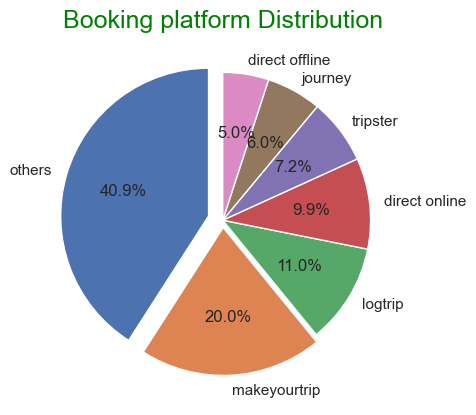

In [70]:
plt.pie(merged_df['booking_platform'].value_counts(),labels = merged_df['booking_platform'].value_counts().index,autopct='%1.1f%%', startangle=90,explode=[0.1,0.05,0,0,0,0,0])
plt.title("Booking platform Distribution",fontsize=18,color='green')
plt.show()

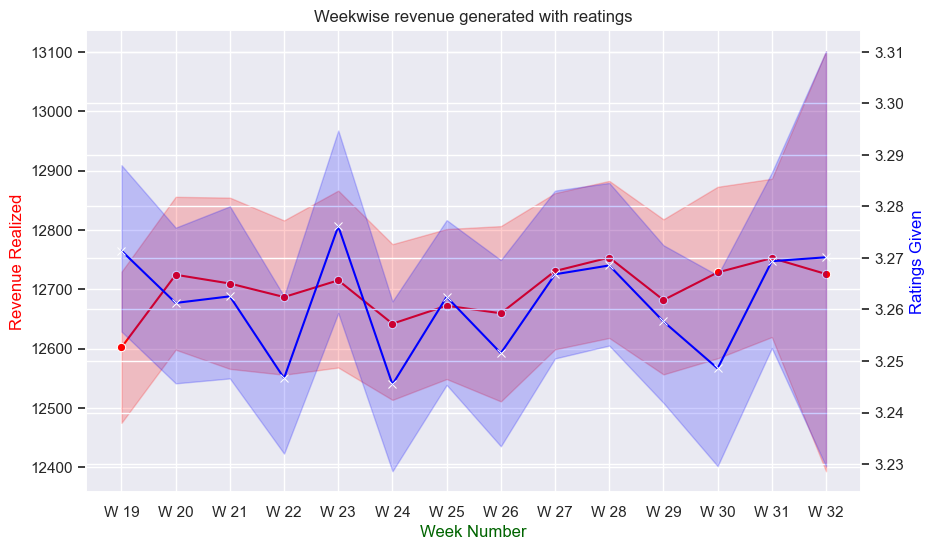

In [80]:
# Create the line plot with primary y-axis
plt.figure(figsize=(10, 6))
ax = sns.lineplot(data=merged_df, x='week no', y='revenue_realized', color='red',marker='o')

# Create a secondary y-axis
ax2 = ax.twinx()

# Add the line plot for 'ratings_given' to the secondary y-axis
sns.lineplot(data=merged_df, x='week no', y='ratings_given', ax=ax2, color='blue',marker='x')

# Set labels and title
ax.set_xlabel('Week Number',color='darkgreen')
ax.set_ylabel('Revenue Realized', color='red')
ax2.set_ylabel('Ratings Given', color='blue')
plt.title('Weekwise revenue generated with reatings')

# Show the plot
plt.show()

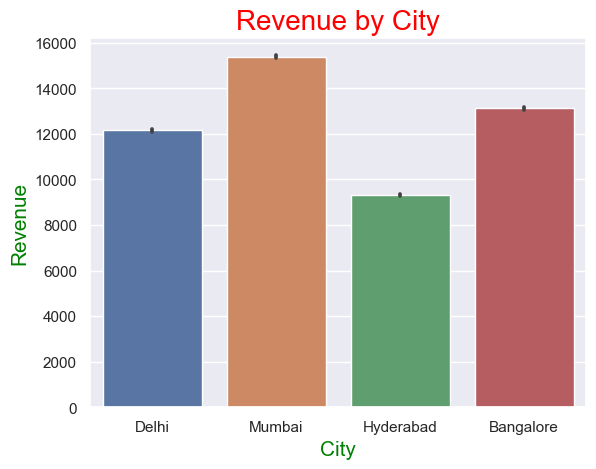

In [82]:
sns.barplot(merged_df,x='city',y ='revenue_realized')
plt.title("Revenue by City",fontsize=20,color= 'red')
plt.xlabel("City",fontsize=15,color='green')
plt.ylabel("Revenue",fontsize=15,color='green')
plt.show()

<Axes: xlabel='capacity', ylabel='successful_bookings'>

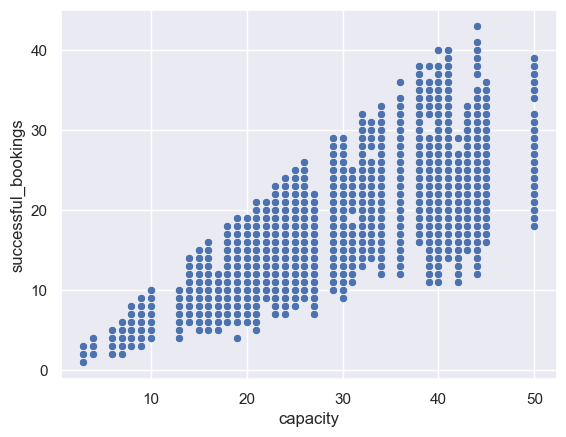

In [98]:
sns.scatterplot(fact_agg_bookings,x='capacity',y='successful_bookings')

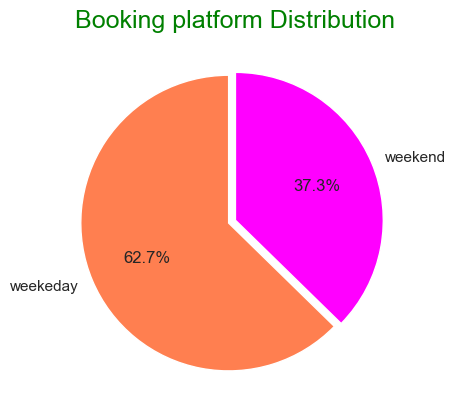

In [108]:
plt.pie(merged_df['day_type'].value_counts(),labels = merged_df['day_type'].value_counts().index,autopct='%1.1f%%', startangle=90,colors=['coral','magenta'],explode=[0.05,0])
plt.title("Booking platform Distribution",fontsize=18,color='green')
plt.show()

In [99]:
merged_df.head()

,booking_id,property_id,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,week no,day_type,property_name,category,city,year,month,day_of_week
0,May012216558RT11,16558,3,Standard,direct online,1,Checked Out,10010,10010,W 19,weekend,Atliq Grands,Luxury,Delhi,2022,5,6
1,May012216558RT12,16558,2,Standard,others,3,Cancelled,9100,3640,W 19,weekend,Atliq Grands,Luxury,Delhi,2022,5,6
2,May012216558RT13,16558,2,Standard,logtrip,5,Checked Out,9100,9100,W 19,weekend,Atliq Grands,Luxury,Delhi,2022,5,6
3,May012216558RT14,16558,2,Standard,others,3,Cancelled,9100,3640,W 19,weekend,Atliq Grands,Luxury,Delhi,2022,5,6
4,May012216558RT15,16558,4,Standard,direct online,5,Checked Out,10920,10920,W 19,weekend,Atliq Grands,Luxury,Delhi,2022,5,6


# Encoding categorical columns

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Label encode 'room_category'
merged_df['room_category'] = label_encoder.fit_transform(merged_df['room_category'])

# Label encode 'booking_platform'
merged_df['booking_platform'] = label_encoder.fit_transform(merged_df['booking_platform'])

# Label encode 'booking_status'
merged_df['booking_status'] = label_encoder.fit_transform(merged_df['booking_status'])

# Label encode 'week no'
merged_df['week no'] = label_encoder.fit_transform(merged_df['week no'])

# Label encode 'day_type'
merged_df['day_type'] = label_encoder.fit_transform(merged_df['day_type'])

# Label encode 'category'
merged_df['category'] = label_encoder.fit_transform(merged_df['category'])

# Label encode 'city'
merged_df['city'] = label_encoder.fit_transform(merged_df['city'])

# Label encode 'property_name'
merged_df['property_name'] = label_encoder.fit_transform(merged_df['property_name'])

In [ ]:
merged_df.head()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Define features (X) and target variable (y)
X = merged_df[['property_name', 'room_category', 'booking_platform', 'ratings_given', 'booking_status', 'revenue_generated', 'week no', 'day_type', 'category', 'city', 'year', 'month', 'day_of_week']]
y = merged_df['revenue_realized']

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the linear regression model
reg = LinearRegression()
reg.fit(X_train, y_train)

# Predict on the test set
y_pred = reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Coefficients -\n{reg.coef_}\n")
print(f'Mean Squared Error: {mse}\n')
print(f'R-squared Score: {r2}\n')
print(f"Intercept :{reg.intercept_}\n")

In [ ]:
'property_name', 'room_category', 'booking_platform', 'ratings_given', 'booking_status', 'revenue_generated', 'week no', 'day_type', 'category',
'city', 'year', 'month', 'day_of_week'

In [ ]:
merged_df.head(2)

In [ ]:
reg.predict([[4,3,1,1,1,10010,0,1,1,1,2002,5,6]])